# Завдання 3

У цьому завданні ми маємо побудувати лінійний регресор. На цей раз ми будемо працювати з даними про захворювання [діабетом](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). Аналогічно до завдання 1 виконайте наступні кроки

1. Завантажте датасет.
2. Розділіть його на тренувальну та тестову вибірки.
3. На тренувальній вибірці навчіть лінійну модель.
4. Оцініть її якість на тестовій вибірці.
5. Спробуйте повторити кроки 1-4 розбивши датасет на навчальну та тестову вибірки в якійсь власній пропорції. Як це позначилося на якості моделі?

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes_dataset = load_diabetes()
X, y = load_diabetes(return_X_y=True, as_frame=True)
diabetes_dataset.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
diabetes_dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
diabetes_dataset.data.shape

(442, 10)

In [5]:
TEST_RANGE = range(5, 91, 5)

## Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
def lin_regr():

    res_lin_regr = []
    for i in TEST_RANGE:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
        clf = LinearRegression().fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        res_lin_regr.append(accuracy)

    return res_lin_regr

## Lasso Regression

In [8]:
from sklearn.linear_model import Lasso

In [9]:
def lasso_regr():

    result_train = []
    for i in TEST_RANGE:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
        clf = Lasso(alpha=0.1).fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        result_train.append(accuracy)
    
    return result_train

## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
def ridge_regr():

    result_train = []
    for i in TEST_RANGE:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)

        clf = Ridge(alpha=0.1).fit(X_train, y_train)

        accuracy = clf.score(X_test, y_test)
        result_train.append(accuracy)
        
    return result_train

## Plot accurasy results

In [12]:
import matplotlib.pyplot as plt

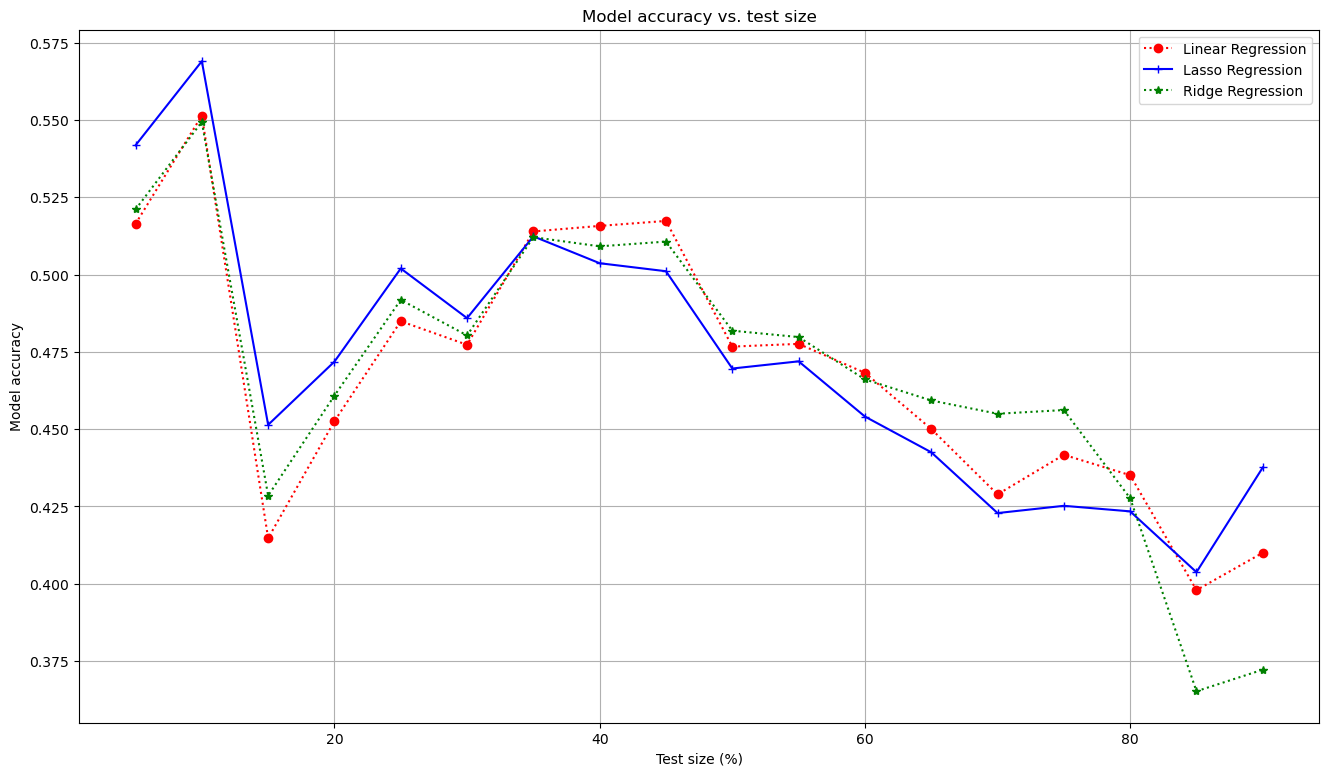

In [13]:
plt.figure(figsize = (16, 9))

plt.plot(range(5, 91, 5), lin_regr(), 'ro:', label='Linear Regression')
plt.plot(range(5, 91, 5), lasso_regr(), 'b+-', label='Lasso Regression')
plt.plot(range(5, 91, 5), ridge_regr(), 'g*:', label='Ridge Regression')

plt.grid()
plt.xlabel('Test size (%)')
plt.ylabel('Model accuracy')
plt.legend()
plt.title('Model accuracy vs. test size')
plt.show()